# Stack Overflow Data - 2018 Survey #

This survey was taken by 98,855 developers on Stack Overflow in 2018. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

large = 22; med = 16; small = 12
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (16, 10),
          'axes.labelsize': small,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': small}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv',low_memory=False)
schema = pd.read_csv('./survey_results_schema.csv')

In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
df.shape

(98855, 129)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


## Data Preparation ##

In [6]:
#get description for each column 
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

get_description(df.columns[0]) # This should return a string of the first column description

'Randomized respondent ID number (not in order of survey response time)'

In [7]:
df.isnull().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

In [8]:
df.dropna(how='all', axis = 1, inplace=True)
df.dropna(how='all', axis = 0, inplace=True)
df.shape #no row or column is fully missing

(98855, 129)

In [9]:
null_counts = df.isnull().sum()/len(df)
null_counts.sort_values(ascending=False, inplace=True)

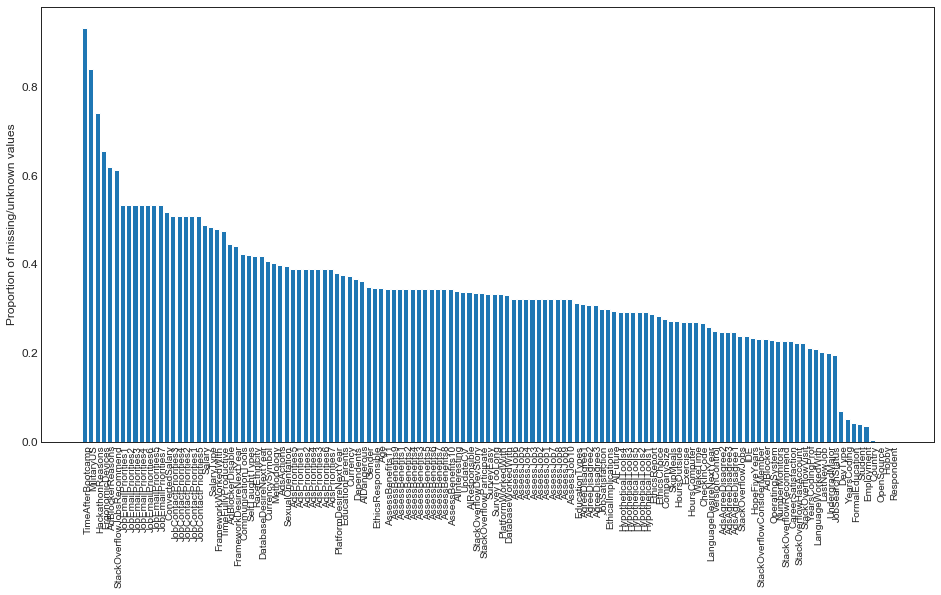

In [10]:
#visualise proportion of missing values per column
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical', fontsize = 10)
plt.ylabel('Proportion of missing/unknown values')
plt.bar(np.arange(len(null_counts)),null_counts);

In [11]:
#drop the rows with more than 30% of the values missing
list_drop = null_counts[null_counts>=0.3].index.to_list()
df.drop(list_drop, axis=1, inplace=True)
df.shape

(98855, 47)

In [12]:
df.dropna(how='all', axis = 1, inplace=True)
df.dropna(how='all', axis = 0, inplace=True)
df.shape #no row or column is fully missing

(98855, 47)

In [13]:
null_counts = df.isnull().sum()/len(df)
null_counts.sort_values(ascending=False, inplace=True)

In [14]:
null_counts

JobSatisfaction                0.299216
EthicalImplications            0.298882
AIFuture                       0.294644
HypotheticalTools4             0.292034
HypotheticalTools3             0.291902
HypotheticalTools5             0.291437
HypotheticalTools2             0.291366
HypotheticalTools1             0.291204
EthicsReport                   0.287583
EthicsChoice                   0.283982
CompanySize                    0.276405
SkipMeals                      0.272207
HoursOutside                   0.271418
Exercise                       0.270568
HoursComputer                  0.270315
WakeTime                       0.270184
CheckInCode                    0.268069
LanguageDesireNextYear         0.259076
VersionControl                 0.248414
AdsAgreeDisagree2              0.247251
AdsAgreeDisagree3              0.247241
AdsAgreeDisagree1              0.246523
StackOverflowJobs              0.238309
IDE                            0.237287
HopeFiveYears                  0.234050


## Question 1 - Developers & Formal Education##

In [15]:
df_formedu = df.copy()
df_formedu['FormalEducation'].fillna('Missing', inplace=True)

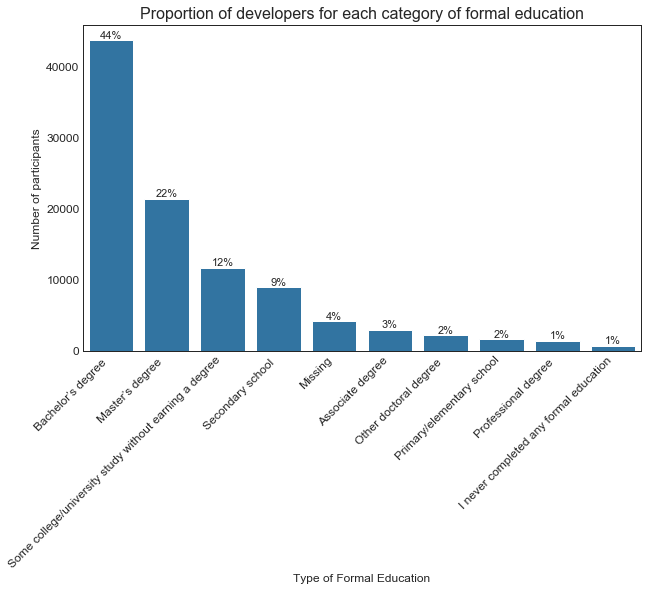

In [45]:
total = df_formedu.shape[0]
fig = plt.figure(figsize=(10,6))
base = sns.color_palette()[0]
order_educ = df_formedu.FormalEducation.value_counts(dropna=False).index.tolist()
labels = [x.split('(')[0] for x in order_educ]
ax = sns.countplot(df_formedu['FormalEducation'], color = base, order = order_educ)
ax.set_xticklabels(labels, rotation = 45, fontsize=12, ha='right');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0%}'.format(height/total),
            ha="center", va='bottom',fontsize=11)
plt.ylabel('Number of participants', fontsize=12)
plt.xlabel('Type of Formal Education', fontsize=12)

ax.set_title('Proportion of developers for each category of formal education', fontsize=16);

We can see from here that two thirds of the developers in the survey have a Bachelor or a Master's Degree. There is a very small proportion of developers not having higher education. 

## Question 2 - Job/Career Satisfaction per category of Formal Education##

In [17]:
my_dictionary = {'Extremely dissatisfied': 0, 'Moderately dissatisfied':1, 'Slightly dissatisfied':2,
                 'Neither satisfied nor dissatisfied':3,  'Slightly satisfied':4, 'Moderately satisfied':5, 
                'Extremely satisfied':6}

In [18]:
df_formedu['JobScore'] = df_formedu['JobSatisfaction'].map(my_dictionary)
df_formedu['CareerScore'] = df_formedu['CareerSatisfaction'].map(my_dictionary)

In [19]:
df_formedu = df_formedu[['FormalEducation','JobSatisfaction', 'CareerSatisfaction', 'JobScore', 'CareerScore', 
                         'HopeFiveYears']]

In [20]:
df_formedu['FormalEducation'] = df_formedu['FormalEducation'].apply(lambda x:str(x).split('(')[0])

In [21]:
# Prepare Data
x = df_formedu.loc[:, ['JobScore']]
df_formedu['JobScore_z'] = (x - x.mean())/x.std()
#df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
#df_formedu.sort_values('JobScore_z', inplace=True)
#df_formedu.reset_index(inplace=True)

x_1 = df_formedu.loc[:, ['CareerScore']]
df_formedu['CareerScore_z'] = (x_1 - x_1.mean())/x_1.std()


In [22]:
df_formedu.head()

,FormalEducation,JobSatisfaction,CareerSatisfaction,JobScore,CareerScore,HopeFiveYears,JobScore_z,CareerScore_z
0,Bachelor’s degree,Extremely satisfied,Extremely satisfied,6.0,6.0,Working as a founder or co-founder of my own c...,1.137076,1.133954
1,Bachelor’s degree,Moderately dissatisfied,Neither satisfied nor dissatisfied,1.0,3.0,Working in a different or more specialized tec...,-1.766706,-0.696541
2,Associate degree,Moderately satisfied,Moderately satisfied,5.0,5.0,Working as a founder or co-founder of my own c...,0.556319,0.523789
3,Bachelor’s degree,Neither satisfied nor dissatisfied,Slightly dissatisfied,3.0,2.0,Working as a founder or co-founder of my own c...,-0.605194,-1.306705
4,Some college/university study without earning ...,Slightly satisfied,Moderately satisfied,4.0,5.0,Working in a different or more specialized tec...,-0.024437,0.523789


In [23]:
test = pd.DataFrame(df_formedu.groupby('FormalEducation')['CareerScore_z','JobScore_z'].mean()).reset_index()
test

,FormalEducation,CareerScore_z,JobScore_z
0,Associate degree,0.024257,0.002321
1,Bachelor’s degree,0.010462,-0.028985
2,I never completed any formal education,-0.351790,-0.277858
3,Master’s degree,0.008108,0.029545
4,Missing,-0.065050,-0.033778
5,Other doctoral degree,0.144899,0.186087
6,Primary/elementary school,-0.170426,-0.029531
7,Professional degree,-0.084667,-0.071869
8,Secondary school,-0.027904,0.062497
9,Some college/university study without earning ...,-0.018161,0.013059


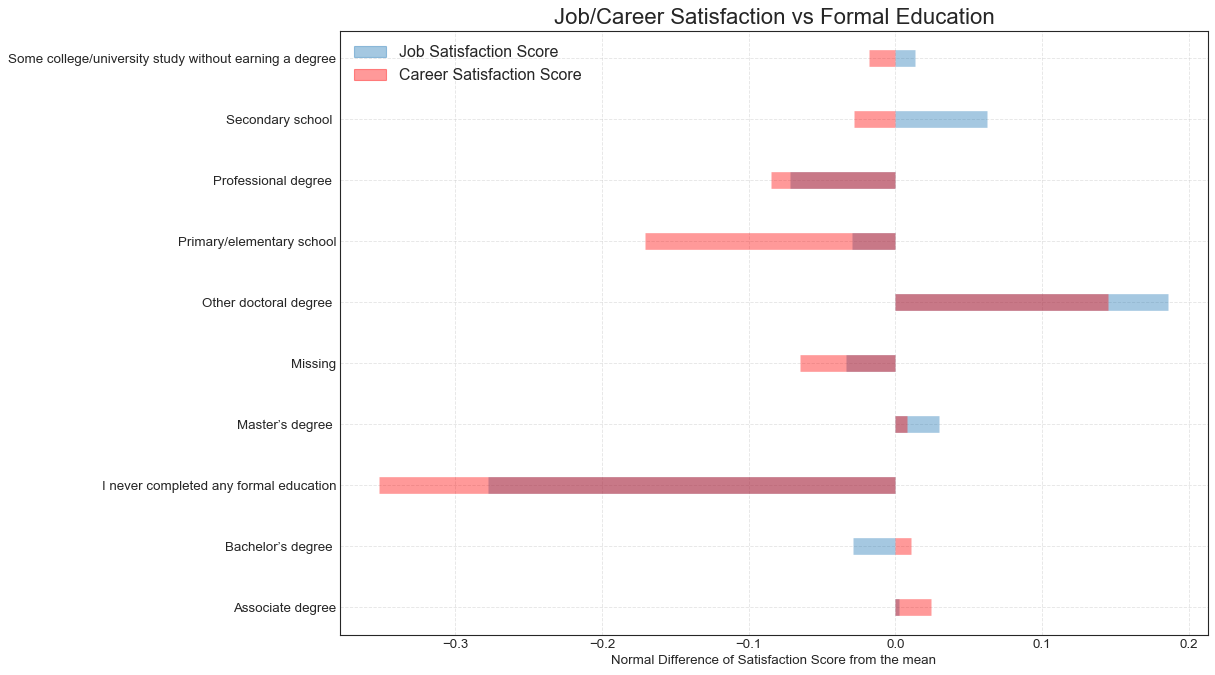

In [47]:
# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plot1 = plt.hlines(y=test.index, xmin=0, xmax=test['JobScore_z'], alpha=0.4, linewidth=15, color=base)
plot2 = plt.hlines(y=test.index, xmin=0, xmax=test['CareerScore_z'], alpha=0.4, linewidth=15, color='red')

blue_line = mpatches.Patch(color=base, label='Job Satisfaction Score', alpha=0.4)
reds_line = mpatches.Patch(color='red', label='Career Satisfaction Score', alpha=0.4)

# Decorations
plt.yticks(test.index, test.FormalEducation,fontsize=12)
plt.title('Job/Career Satisfaction vs Formal Education', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('Normal Difference of Satisfaction Score from the mean',fontsize=12)
plt.legend(handles=[blue_line, reds_line],loc='upper left', fontsize='x-large')
plt.show();

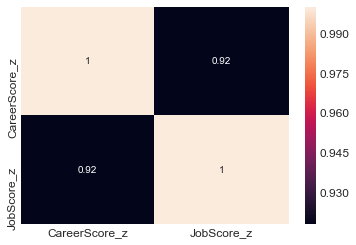

In [25]:
sns.heatmap(test.corr(), annot=True);

I have mapped the values of satisfactions to numerical scores as following:
- 'Extremely dissatisfied': 0
- 'Moderately dissatisfied':1
- 'Slightly dissatisfied':2
- 'Neither satisfied nor dissatisfied':3 
- 'Slightly satisfied':4 
- 'Moderately satisfied':5 
- 'Extremely satisfied':6

There is a 92% correlation between Job Satisfaction and Career Satisfaction, which can also be seen in the chart below as the two scores go often in the same direction. 

People who never completed any formal education have the lowest job and career satisfaction, followed by developers with primary school education only. Instead people with doctoral degree are very satisfied, followed by Master's degree students. Developers who studied until Secondary school have a higher job satisfaction compare to Master's graduates but a lower career satisfaction. 

## Question 3 - Hope in the next 5 years##

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 47 columns):
Respondent                     98855 non-null int64
Hobby                          98855 non-null object
OpenSource                     98855 non-null object
Country                        98443 non-null object
Student                        94901 non-null object
Employment                     95321 non-null object
FormalEducation                94703 non-null object
UndergradMajor                 79036 non-null object
CompanySize                    71531 non-null object
DevType                        92098 non-null object
YearsCoding                    93835 non-null object
YearsCodingProf                77903 non-null object
JobSatisfaction                69276 non-null object
CareerSatisfaction             76504 non-null object
HopeFiveYears                  75718 non-null object
JobSearchStatus                79488 non-null object
LastNewJob                     78889 non-nul

In [27]:
df.HopeFiveYears.value_counts()

Working in a different or more specialized technical role than the one I'm in now    25643
Working as a founder or co-founder of my own company                                 19444
Doing the same work                                                                  14724
Working as an engineering manager or other functional manager                         7483
Working as a product manager or project manager                                       5004
Working in a career completely unrelated to software development                      2151
Retirement                                                                            1269
Name: HopeFiveYears, dtype: int64

In [28]:
df_formedu['FormalEducation'] = df_formedu['FormalEducation'].astype(str)

In [29]:
df_formedu[df_formedu['FormalEducation'].isin(['Master’s degree ', 'Professional degree ', 'Other doctoral degree '])]

,FormalEducation,JobSatisfaction,CareerSatisfaction,JobScore,CareerScore,HopeFiveYears,JobScore_z,CareerScore_z
10,Master’s degree,Moderately dissatisfied,Moderately dissatisfied,1.0,1.0,Doing the same work,-1.766706,-1.916870
15,Master’s degree,Moderately dissatisfied,Extremely dissatisfied,1.0,0.0,Working in a different or more specialized tec...,-1.766706,-2.527035
17,Master’s degree,Moderately satisfied,Moderately satisfied,5.0,5.0,Working in a different or more specialized tec...,0.556319,0.523789
24,Master’s degree,Moderately satisfied,Moderately satisfied,5.0,5.0,Working as a founder or co-founder of my own c...,0.556319,0.523789
25,Master’s degree,Slightly dissatisfied,Slightly dissatisfied,2.0,2.0,Working in a different or more specialized tec...,-1.185950,-1.306705
26,Master’s degree,Moderately satisfied,Slightly satisfied,5.0,4.0,Working in a different or more specialized tec...,0.556319,-0.086376
31,Master’s degree,Slightly satisfied,Moderately satisfied,4.0,5.0,Working as a founder or co-founder of my own c...,-0.024437,0.523789
34,Master’s degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Master’s degree,Extremely satisfied,Moderately satisfied,6.0,5.0,Working as a founder or co-founder of my own c...,1.137076,0.523789
39,Master’s degree,Neither satisfied nor dissatisfied,Slightly dissatisfied,3.0,2.0,Working in a different or more specialized tec...,-0.605194,-1.306705


In [30]:
masters_list = ['Master’s degree ', 'Professional degree ', 'Other doctoral degree ']
df_formedu['masters'] = 0
m = df_formedu['FormalEducation'].isin(masters_list)

df_formedu['masters'] = df_formedu['masters'].mask(m,1)

In [53]:
df_formedu['HopeFiveYears'].value_counts().index

Index(['Working in a different or more specialized technical role than the one I'm in now',
       'Working as a founder or co-founder of my own company',
       'Doing the same work',
       'Working as an engineering manager or other functional manager',
       'Working as a product manager or project manager',
       'Working in a career completely unrelated to software development',
       'Retirement'],
      dtype='object')

In [56]:
df_formedu.shape

(98855, 9)

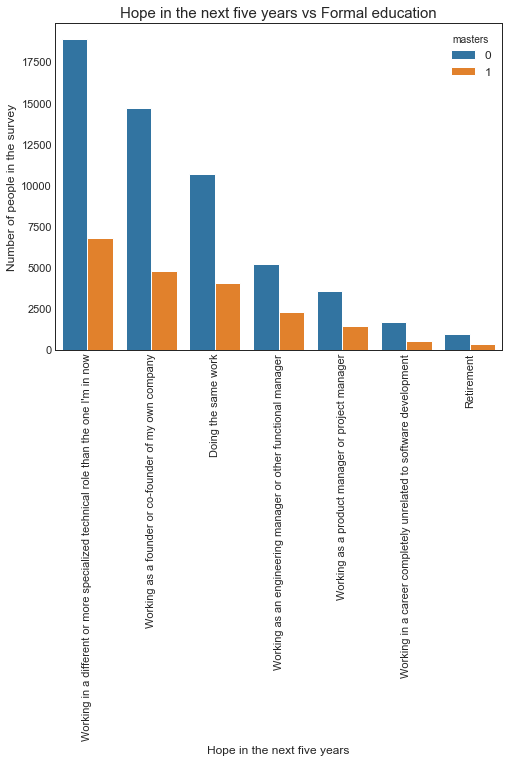

In [54]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'HopeFiveYears', hue= 'masters', data = df_formedu, 
                   order = df_formedu['HopeFiveYears'].value_counts().index)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11, rotation=90)
plt.ylabel('Number of people in the survey',fontsize=12)
plt.xlabel('Hope in the next five years',fontsize=12)
plt.title('Hope in the next five years vs Formal education',fontsize=15);

In [32]:
corr_df = df_formedu[['masters','HopeFiveYears']]

In [33]:
corr_df_dummies = pd.get_dummies(corr_df['HopeFiveYears'], drop_first=True)

In [34]:
corr_df_dummies.insert(0,'masters', corr_df['masters'],True)

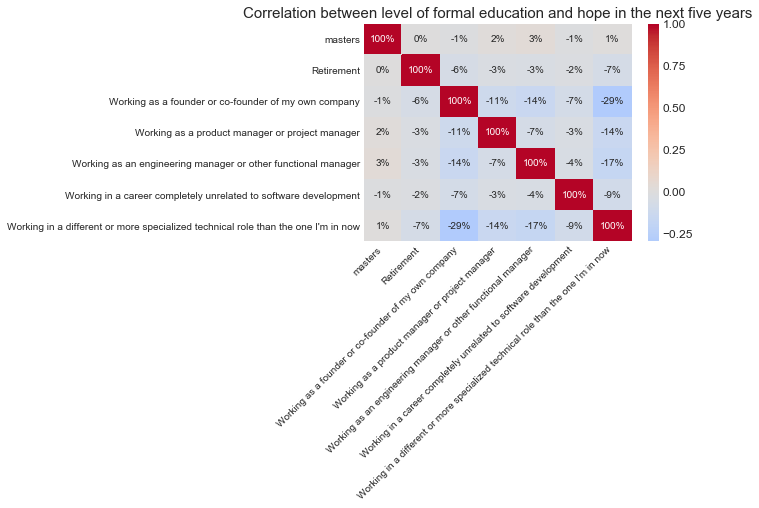

In [61]:
sns.heatmap(corr_df_dummies.corr(),annot=True, cmap='coolwarm', center=0, fmt='.0%')
plt.xticks(fontsize=10,rotation = 45,ha = 'right')
plt.yticks(fontsize=10)
plt.title('Correlation between level of formal education and hope in the next five years',fontsize=15);

In [63]:
df_formedu['HopeFiveYears'].value_counts()/len(df_formedu)

Working in a different or more specialized technical role than the one I'm in now    0.259400
Working as a founder or co-founder of my own company                                 0.196692
Doing the same work                                                                  0.148945
Working as an engineering manager or other functional manager                        0.075697
Working as a product manager or project manager                                      0.050620
Working in a career completely unrelated to software development                     0.021759
Retirement                                                                           0.012837
Name: HopeFiveYears, dtype: float64